### Plotting RBP binding profiles

Here, we show how to plot the RBP binding profiles. 

The RBP coordinates and PSI values can be downloaded from Zenodo. 

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

from plot_peaks_RBP import plot_peaks_RBP

### Hippocampus

First, we load the peaks from the eCLIP data. In the dataframe, every row is a gene and every column is an RBP. The values indicate begin and end of peaks measured.

In [2]:
peaks_path = '../../PSI_prediction/Zenodo/Human/HPC/RBP/RBP_coor_repl.pickle'
RBP_coor_repl, rows, columns = pd.read_pickle(peaks_path)
peaks = pd.DataFrame(RBP_coor_repl, index=rows, columns=columns)


Read the PSI values, so we can split later on for exons < 0.5 and exons > 0.5

In [3]:
PSI_glia = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/PSI/PSI_glia_norm.csv', 
                       index_col=0)
PSI_neur = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/PSI/PSI_neur_norm.csv', 
                       index_col=0)
PSI = pd.concat((PSI_glia, PSI_neur), axis=1)
PSI.columns = ['Glia', 'Neurons']

# Only keep the exons with PSI value defined in neurons and glia
PSI = PSI.loc[PSI.notna().sum(axis=1) > 1]
PSI_glia = PSI_glia.loc[PSI.index]
PSI_neur = PSI_neur.loc[PSI.index]


Next, we read the RBP counts. This is slightly different from the peaks. Here, there are no coordinates per gene/RBP, but there is counted per exon already how many RBPs bind at a specific location. We use this to filter out the exons with no RBP binding sites since these genes were probably not expressed/measured in the eCLIP data.

In [4]:
RBP_counts = pd.read_csv('../../PSI_prediction/Zenodo/Human/HPC/RBP/RBP_peaks.csv', 
                         index_col=0)
RBP_counts = RBP_counts.loc[PSI.index]
tokeep = np.sum(RBP_counts, axis=1) > 0

Split the names of the exons based so that we get the chromosome, begin, end, gene name and strand

In [5]:
exons_info = pd.DataFrame(RBP_counts.index)[0].str.split('_',expand=True)
exons_info.iloc[:5]

,0,1,2,3,4
0,chr10,100002942,100003023,ENSG00000107554,-
1,chr10,1000677,1000868,ENSG00000107937,+
2,chr10,100158984,100159055,ENSG00000107566,-
3,chr10,100167348,100167406,ENSG00000107566,-
4,chr10,100174208,100174281,ENSG00000107566,-


Now we can plot the RBPs of interest.

  0%|          | 0/37382 [00:00<?, ?it/s]

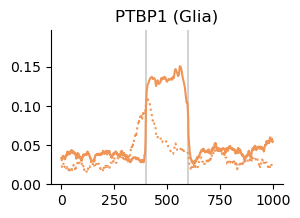

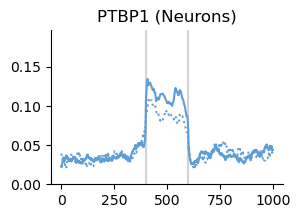

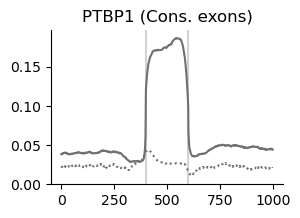

  0%|          | 0/37382 [00:00<?, ?it/s]

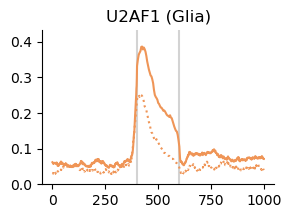

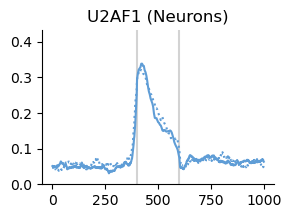

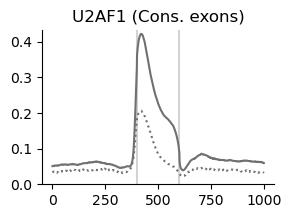

  0%|          | 0/37382 [00:00<?, ?it/s]

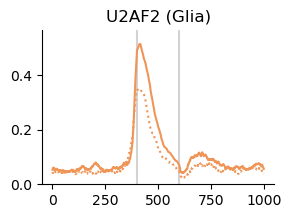

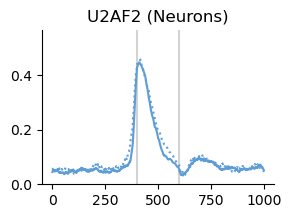

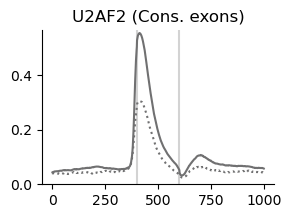

  0%|          | 0/37382 [00:00<?, ?it/s]

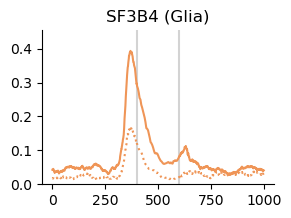

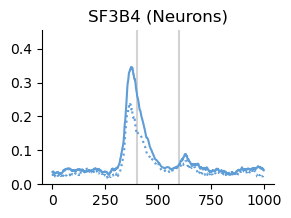

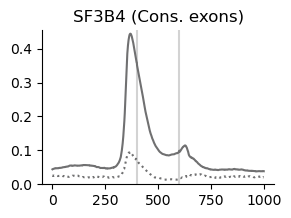

  0%|          | 0/37382 [00:00<?, ?it/s]

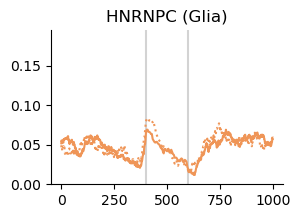

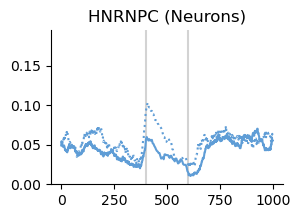

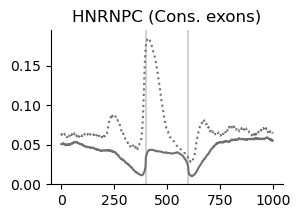

  0%|          | 0/37382 [00:00<?, ?it/s]

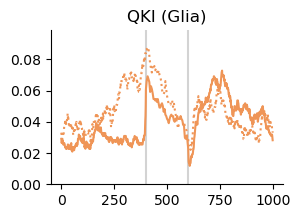

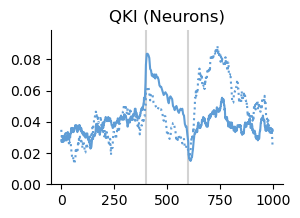

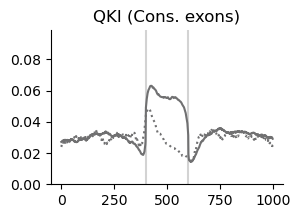

In [6]:
RBPs = ['PTBP1', 'U2AF1', 'U2AF2', 'SF3B4', 'HNRNPC','QKI']
t = 0.5 #Split between high and low PSI values

for rbp in RBPs:
    plot_peaks_RBP(rbp, exons_info.iloc[tokeep.values], peaks, 
                   PSI_glia[tokeep], PSI_neur[tokeep], 
                   highthres=t, lowthres=t,
                  save=False)